# Hierarchical Models

In [40]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

# X is an array of data points
# y represents which cluster each array belongs to
# you can check the new clusters against the y array to confirm accuracy

In [41]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # because the blobs output to array, the hash works here
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

### Hierarchical Clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as atree (or a dendrogram). The root of the tree is the unique cluster that gathers all the samples, with the leaves being the clusters with only one sample.

We will focus on **Agglomerative clustering**. It performs a hierarchical clustering using a bottom-up approach. Each observation starts in its own cluster, and the clusters are successively merged together.

Let's begin by importing the necessary libraries:

In [42]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [44]:
# create an object from the AgglomerativeClustering class
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters=3)

In the code above, we created an `AgglomerativeClustering` object. We set the Eculidean distance to the `affinity` parameter and set the number of clusters to three. We also set the `linkage` parameter to the `ward`. The linkage criteria determines the metric used for the merge strategy.
- `ward` minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is simlar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- `maximum` or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- `average` linkage minimizes the average of the distances between all observations of pairs of clusters.
- `single` linkage minimizes the distance between the closest observations of pairs of clusters.

In [45]:
# fit and predict
y_hc = ac.fit_predict(X)

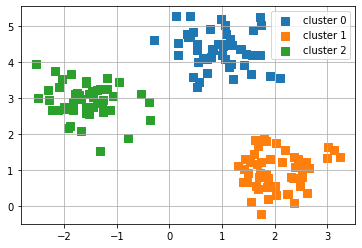

In [46]:
# plot the results
plot_clusters(X, y_hc)

From the plot above, we can see that the `Agglomerative clustering` clustered the data as we expected. There is no difference between `k-means` results from the last tutorial and these results.

# Dendrogram

In [54]:
# define plot_dendrogram function
def plot_dendrogram(X, method = 'ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distances')
    plt.xlabel('Points')
    plt.show()

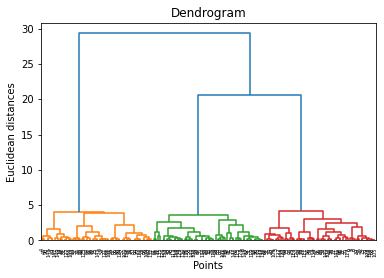

In [53]:
plot_dendrogram(X)